## Data Cleaning and EDA of NBA Stats for MVP Prediction

### Loading Packages and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
mvp_df = pd.read_csv(r'Documents\MVP Voting.csv')

In [3]:
mvp_df.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,28,CHI,80.0,900.0,960,0.938,80,38.8,30.1,6.4,6.1,2.3,0.9,0.519,0.270,0.832,17.7,0.274,1992
1,2,Clyde Drexler,29,POR,12.0,561.0,960,0.584,76,36.2,25.0,6.6,6.7,1.8,0.9,0.470,0.337,0.794,12.8,0.223,1992
2,3,David Robinson,26,SAS,2.0,337.0,960,0.351,68,37.7,23.2,12.2,2.7,2.3,4.5,0.551,0.125,0.701,13.9,0.260,1992
3,4,Karl Malone,28,UTA,1.0,262.0,960,0.273,81,37.7,28.0,11.2,3.0,1.3,0.6,0.526,0.176,0.778,15.1,0.237,1992
4,5,Patrick Ewing,29,NYK,0.0,100.0,960,0.104,82,38.4,24.0,11.2,1.9,1.1,3.0,0.522,0.167,0.738,13.0,0.198,1992


In [4]:
# Simplifying mvp df to remove columns that exist in the stats df
mvp_df = mvp_df[['Player','Year','Pts Won','Pts Max','Share']]

In [5]:
mvp_df.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1992,900.0,960,0.938
1,Clyde Drexler,1992,561.0,960,0.584
2,David Robinson,1992,337.0,960,0.351
3,Karl Malone,1992,262.0,960,0.273
4,Patrick Ewing,1992,100.0,960,0.104


In [6]:
stats_df = pd.read_csv(r'Documents\Player Stats for MVP.csv')

In [7]:
stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,0.0,0.0,NaN,2.5,5.1,.493,.493,1.1,1.4,.752,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992
1,2,Mahmoud Abdul-Rauf,PG,22,DEN,81,11,19.0,4.4,10.4,.421,0.4,1.2,.330,4.0,9.3,.433,.440,1.2,1.3,.870,0.3,1.1,1.4,2.4,0.5,0.0,1.4,1.6,10.3,1992
2,3,Mark Acres,C,29,ORL,68,6,13.6,1.1,2.2,.517,0.0,0.0,.333,1.1,2.2,.520,.520,0.8,1.0,.761,1.4,2.3,3.7,0.3,0.4,0.2,0.5,2.1,3.1,1992
3,4,Michael Adams,PG,29,WSB,78,78,35.8,6.2,15.8,.393,1.6,4.9,.324,4.6,10.9,.425,.444,4.0,4.6,.869,0.7,3.2,4.0,7.6,1.9,0.1,2.7,2.1,18.1,1992
4,5,Rafael Addison,SF,27,NJN,76,8,15.5,2.5,5.7,.433,0.2,0.6,.286,2.3,5.0,.452,.449,0.7,1.0,.737,0.9,1.3,2.2,0.9,0.4,0.4,0.6,1.4,5.8,1992


### Data Cleaning

In [8]:
stats_df.drop('Rk',axis=1,inplace=True)

In [9]:
stats_df['Player'] = stats_df['Player'].str.replace("*","")

Where players were traded in-season, there are multiple lines for each player for one season. The rows where Tm = 'TOT' represents the average for the year, while the other lines for the season represent the averages for each team the player appeared for that season. We only want the season averages, so we will write a function to remove any player rows that are duplicative for the season.

In [10]:
def single_row(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df['Tm']=='TOT']
        row['Tm'] = df.iloc[-1,:]['Tm']
        return row

stats_df = stats_df.groupby(['Player','Year']).apply(single_row)

In [11]:
stats_df.head(10)

Player Pos Age   Tm   G  GS    MP   FG   FGA   FG%  \
Player     Year                                                                
A.C. Green 1992 175   A.C. Green  PF  28  LAL  82  53  35.4  4.7   9.8  .476   
           1993 635   A.C. Green  PF  29  LAL  82  55  34.4  4.6   8.6  .537   
           1994 1123  A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3  .502   
           1995 1612  A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5  .504   
           1996 2109  A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4  .484   
           1997 2685  A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8  .483   
           1998 3273  A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5  .453   
           1999 3832  A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1  .422   
           2000 4361  A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7  .447   
           2001 4881  A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0  .444   

                       3P  3PA   3P%   2P   2PA   2P%  eFG%   FT  FTA   FT%  \
Player     Year                                                               
A.C. Green 1992 175   0.1  0.7  .214  4.5   9.1  .495  .483  4.1  5.6  .744   
           1993 635   0.2  0.6  .348  4.4   8.0  .550  .548  3.4  4.6  .739   
           1994 1123  0.1  0.4  .229  5.6  10.9  .513  .506  3.2  4.4  .735   
           1995 1612  0.5  1.5  .339  3.3   6.0  .547  .539  3.1  4.2  .732   
           1996 2109  0.2  0.6  .269  2.5   4.8  .513  .500  2.0  2.9  .709   
           1997 2685  0.0  0.2  .050  2.8   5.6  .502  .485  1.5  2.4  .650   
           1998 3273  0.0  0.0  .000  3.0   6.5  .457  .453  1.4  2.0  .716   
           1999 3832  0.0  0.2  .000  2.2   5.0  .435  .422  0.6  1.0  .577   
           2000 4361  0.0  0.0  .250  2.1   4.7  .449  .448  0.8  1.2  .695   
           2001 4881  0.0  0.1  .000  1.8   3.9  .453  .444  1.0  1.4  .712   

                      ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
Player     Year                                                           
A.C. Green 1992 175   3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7  13.6  1992  
           1993 635   3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8  12.8  1993  
           1994 1123  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7  14.7  1994  
           1995 1612  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8  11.2  1995  
           1996 2109  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   7.5  1996  
           1997 2685  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   7.2  1997  
           1998 3273  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   7.3  1998  
           1999 3832  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   4.9  1999  
           2000 4361  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   5.0  2000  
           2001 4881  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   4.5  2001

In [12]:
# Dropping the two extra index columns from the grouped df

stats_df.index = stats_df.index.droplevel()
stats_df.index = stats_df.index.droplevel()

In [13]:
# Merging the player stats with the mvp voting info
combined_df = stats_df.merge(mvp_df, how='outer', on = ['Player','Year'])

In [14]:
combined_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,0.1,0.7,.214,4.5,9.1,.495,.483,4.1,5.6,.744,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,0.2,0.6,.348,4.4,8.0,.550,.548,3.4,4.6,.739,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,0.1,0.4,.229,5.6,10.9,.513,.506,3.2,4.4,.735,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,0.5,1.5,.339,3.3,6.0,.547,.539,3.1,4.2,.732,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,0.2,0.6,.269,2.5,4.8,.513,.500,2.0,2.9,.709,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN


In [15]:
# Inputting 0 for null MVP columns
combined_df[["Pts Won", "Pts Max", "Share"]] = combined_df[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [16]:
combined_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,0.1,0.7,.214,4.5,9.1,.495,.483,4.1,5.6,.744,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,0.2,0.6,.348,4.4,8.0,.550,.548,3.4,4.6,.739,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,0.1,0.4,.229,5.6,10.9,.513,.506,3.2,4.4,.735,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,0.5,1.5,.339,3.3,6.0,.547,.539,3.1,4.2,.732,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,0.2,0.6,.269,2.5,4.8,.513,.500,2.0,2.9,.709,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0


In [17]:
team_df = pd.read_csv(r'Documents\NBA Team Records.csv')

In [18]:
team_df.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,51,31,.622,—,106.6,103.0,3.41,1992,Boston Celtics*
1,51,31,.622,—,101.6,97.7,3.67,1992,New York Knicks*
2,40,42,.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets*
3,38,44,.463,13.0,105.0,109.2,-3.94,1992,Miami Heat*
4,35,47,.427,16.0,101.9,103.2,-1.34,1992,Philadelphia 76ers


In [19]:
team_df = team_df[~team_df['W'].str.contains('Division')]

In [20]:
# Remove asterisks and trailing whitespace from Team column
import string

team_df['Team'] = team_df['Team'].str.replace("*","")
team_df['Team'] = team_df['Team'].str.replace(r"\(.*\)","")
team_df['Team'] = team_df['Team'].str.strip()

In [21]:
team_codes = pd.read_csv(r'Documents\NBA Team Name Mapping.csv')

In [22]:
team_df = team_df.merge(team_codes, how = 'left', on = 'Team')

In [23]:
team_df.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team,Tm
0,51,31,.622,—,106.6,103.0,3.41,1992,Boston Celtics,BOS
1,51,31,.622,—,101.6,97.7,3.67,1992,New York Knicks,NYK
2,40,42,.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets,NJN
3,38,44,.463,13.0,105.0,109.2,-3.94,1992,Miami Heat,MIA
4,35,47,.427,16.0,101.9,103.2,-1.34,1992,Philadelphia 76ers,PHI


In [24]:
combined_stats = combined_df.merge(team_df, how = 'left', on = ['Tm','Year'])
combined_stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS,Team
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,0.1,0.7,.214,4.5,9.1,.495,.483,4.1,5.6,.744,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,43,39,.524,14.0,100.4,101.5,-0.95,Los Angeles Lakers
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,0.2,0.6,.348,4.4,8.0,.550,.548,3.4,4.6,.739,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,39,43,.476,23.0,104.2,105.5,-1.20,Los Angeles Lakers
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,0.1,0.4,.229,5.6,10.9,.513,.506,3.2,4.4,.735,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,56,26,.683,7.0,108.2,103.4,4.68,Phoenix Suns
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,0.5,1.5,.339,3.3,6.0,.547,.539,3.1,4.2,.732,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,59,23,.720,—,110.6,106.8,3.86,Phoenix Suns
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,0.2,0.6,.269,2.5,4.8,.513,.500,2.0,2.9,.709,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,41,41,.500,23.0,104.3,104.0,0.28,Phoenix Suns


In [25]:
# Converting object measures to numeric
combined_stats = combined_stats.apply(pd.to_numeric, errors='ignore')

In [26]:
combined_stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
Team        object
dtype: object

In [27]:
# Checking why the GB (games back) column shows as object
combined_stats['GB'].unique()

array(['14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0', '24.0',
       '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0', '19.0',
       '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0', '20.0',
       '11.0', '5.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [28]:
combined_stats['GB'] = combined_stats['GB'].str.replace('—','0')

In [29]:
combined_stats['GB'] = pd.to_numeric(combined_stats['GB'])

## Exploratory Analysis

### How much do our top scorers score?
Prolific scorers each year are often near the top of the MVP list, so let's look at how much our top scorers score each year.

In [30]:
# New df to group by year and return the top player by points
top_scorers_year = combined_stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

In [31]:
top_scorers_year

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS,Team
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1992,9742,Michael Jordan,SG,28,CHI,80,80,38.8,11.8,22.7,0.519,0.3,1.3,0.270,11.5,21.5,0.533,0.526,6.1,7.4,0.832,1.1,5.3,6.4,6.1,2.3,0.9,2.5,2.5,30.1,1992,900.0,960.0,0.938,67,15,0.817,0.0,109.9,99.5,10.07,Chicago Bulls
1993,9743,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,1.0,2.9,0.352,11.7,22.7,0.514,0.515,6.1,7.3,0.837,1.7,5.0,6.7,5.5,2.8,0.8,2.7,2.4,32.6,1993,565.0,980.0,0.577,57,25,0.695,0.0,105.2,98.9,6.19,Chicago Bulls
1994,3301,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.507,0.1,0.4,0.345,10.4,20.4,0.510,0.510,8.7,11.6,0.749,3.0,7.7,10.7,4.8,1.7,3.3,3.2,2.9,29.8,1994,730.0,1010.0,0.723,55,27,0.671,3.0,100.0,94.8,5.05,San Antonio Spurs
1995,12254,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,0.0,0.1,0.000,11.8,20.1,0.585,0.583,5.8,10.8,0.533,4.2,7.3,11.4,2.7,0.9,2.4,2.6,3.3,29.3,1995,605.0,1050.0,0.576,57,25,0.695,0.0,110.9,103.8,6.44,Orlando Magic
1996,9745,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,1.4,3.2,0.427,9.8,19.4,0.506,0.525,6.7,8.0,0.834,1.8,4.8,6.6,4.3,2.2,0.5,2.4,2.4,30.4,1996,1114.0,1130.0,0.986,72,10,0.878,0.0,105.2,92.9,11.80,Chicago Bulls
1997,9746,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,1.4,3.6,0.374,9.9,19.5,0.507,0.516,5.9,7.0,0.833,1.4,4.5,5.9,4.3,1.7,0.5,2.0,1.9,29.6,1997,957.0,1150.0,0.832,69,13,0.841,0.0,103.1,92.3,10.70,Chicago Bulls
1998,9747,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,0.4,1.5,0.238,10.4,21.5,0.482,0.473,6.9,8.8,0.784,1.6,4.2,5.8,3.5,1.7,0.5,2.3,1.8,28.7,1998,1084.0,1160.0,0.934,62,20,0.756,0.0,96.7,89.6,7.24,Chicago Bulls
1999,339,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,1.2,4.1,0.291,7.9,17.9,0.440,0.439,7.4,9.9,0.751,1.4,3.5,4.9,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270,28,22,0.560,5.0,89.7,87.6,2.56,Philadelphia 76ers
2000,12259,Shaquille O'Neal,C,27,LAL,79,79,40.0,12.1,21.1,0.574,0.0,0.0,0.000,12.1,21.1,0.575,0.574,5.5,10.4,0.524,4.3,9.4,13.6,3.8,0.5,3.0,2.8,3.2,29.7,2000,1207.0,1210.0,0.998,67,15,0.817,0.0,100.8,92.3,8.41,Los Angeles Lakers


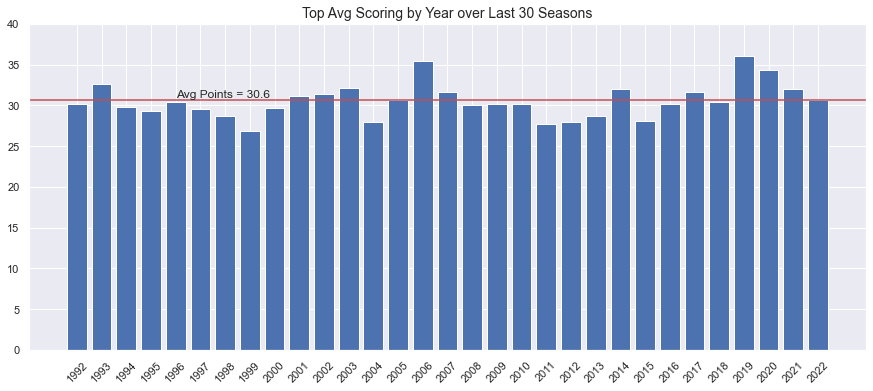

In [32]:
avg_pts = round(top_scorers_year['PTS'].mean(),1)

plt.figure(figsize=(15,6))
plt.bar(top_scorers_year['Year'],top_scorers_year['PTS'])
plt.axhline(y=avg_pts, color='r', linestyle='-')
plt.text(1996,31,'Avg Points = {}'.format(avg_pts))
plt.xticks(rotation=45)
plt.xticks(top_scorers_year['Year'])
plt.ylim([0,40])
plt.title('Top Avg Scoring by Year over Last 30 Seasons',fontsize=14)
plt.show()

### Who are the top 10 scorers over the last 30 years?

In [33]:
top_10_scorers = combined_stats.sort_values("PTS", ascending=False).head(10)
top_10_scorers['Player_Season'] = top_10_scorers['Player'] + "-" + top_10_scorers['Year'].astype(str)

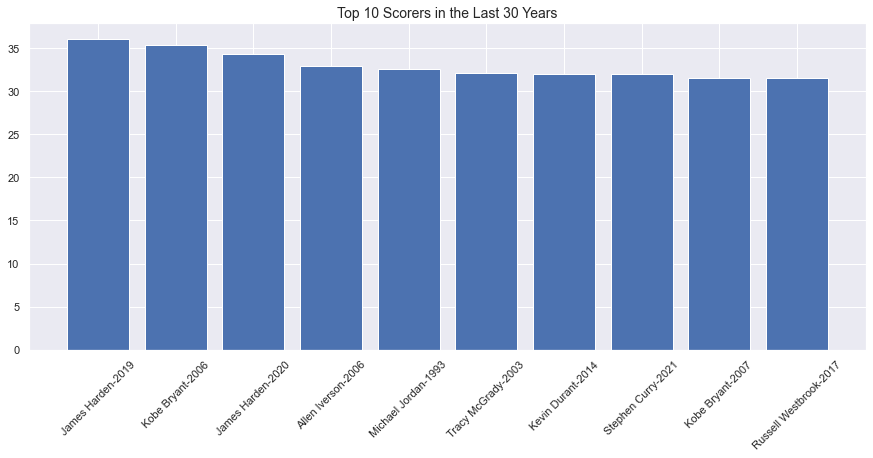

In [34]:
plt.figure(figsize=(15,6))
plt.bar(top_10_scorers['Player_Season'], top_10_scorers['PTS'])
plt.xticks(rotation=45)
plt.title('Top 10 Scorers in the Last 30 Years', fontsize = 14)
plt.show()

### Relationship between points per game and MVP voting share?
Can we plot points scored per game vs the share of MVP votes and notice a relationship?

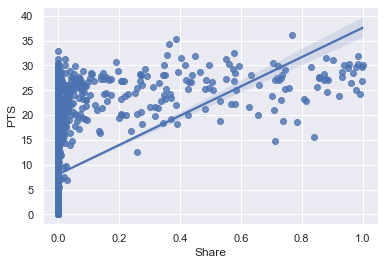

In [35]:
sns.regplot(x="Share", y="PTS", data=combined_stats)
plt.show()

In [36]:
combined_stats['PTS'].corr(combined_stats['Share'])

0.286890974411528

**Thoughts**

We can see a strong visual relationship between points and mvp voting share, with there being less scatter around the regression line once moving away from players at the beginning of the plot who received 0 votes. The correlation coefficient indicates a weak positive correlation, however, this is likely being deflated by the large number of players that didn't receive any MVP votes.

### Relationship between win % and MVP voting share?
Can we plot a player's team winning percentage vs the share of MVP votes and notice a relationship?

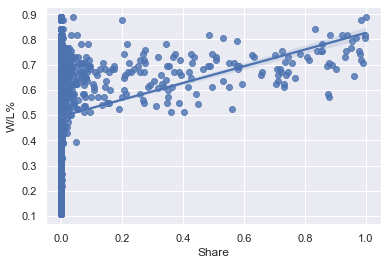

In [37]:
sns.regplot(x="Share", y="W/L%", data=combined_stats)
plt.show()

In [38]:
combined_stats['W/L%'].corr(combined_stats['Share'])

0.12426502776320213

**Thoughts**

While there visually appears to be a relationship winning percentage and MVP voting share, the correlation coefficient is likely being deflated again by the large volume of players that received 0 MVP votes.

### Correlation Analysis

Let's calculate the correlation coefficients for dataframe columns with MVP voting share. I will remove Pts Won and Pts Max for now, as these are the direct inputs into calculating Share.

In [39]:
combined_stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G',
       'SRS', 'Team'],
      dtype='object')

In [40]:
df_minus_mvppoints = combined_stats.drop(['Pts Max','Pts Won'],axis =1)
df_minus_mvppoints.corr()['Share']

Age      0.018294
G        0.089028
GS       0.166831
MP       0.160586
FG       0.275522
FGA      0.247992
FG%      0.064244
3P       0.094153
3PA      0.094155
3P%      0.013070
2P       0.277003
2PA      0.252902
2P%      0.059888
eFG%     0.056946
FT       0.316608
FTA      0.322260
FT%      0.036215
ORB      0.101943
DRB      0.216937
TRB      0.189422
AST      0.199827
STL      0.171522
BLK      0.154291
TOV      0.233367
PF       0.072672
PTS      0.286891
Year    -0.008753
Share    1.000000
W        0.120320
L       -0.119767
W/L%     0.124265
GB      -0.099313
PS/G     0.042161
PA/G    -0.038747
SRS      0.119524
Name: Share, dtype: float64

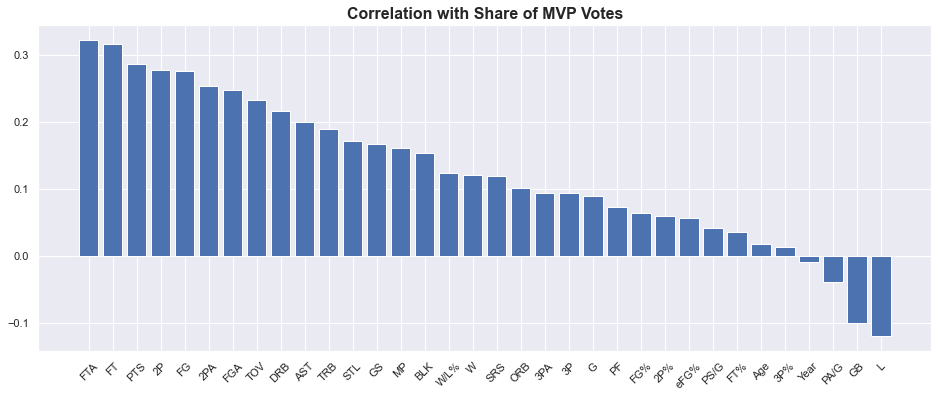

In [41]:
df_corr = pd.DataFrame(df_minus_mvppoints.corr()['Share']).reset_index().rename(columns={'index':'Column'}).sort_values(by='Share', ascending = False)
df_corr = df_corr[df_corr['Column']!= 'Share']

plt.figure(figsize=(16,6))
plt.bar(df_corr['Column'],df_corr['Share'])
plt.xticks(rotation=45)
plt.title('Correlation with Share of MVP Votes', fontsize = 16, fontweight = 'bold')
plt.show()

**Thoughts**

There aren't any moderate or high levels of correlation with any of the columns. It is interesting to see that free throw attempts and free throws are slightly above the points variable. This might suggest that if a player is able to take many trips to the free throw line each game then they might have a better chance to secure MVP votes.

In [42]:
combined_stats.to_csv(r'Documents\Cleaned Stats for NBA MVP.csv', index=False)